# Multi-Dimensional Linear Regression

This notebook demonstrates the implementation of multi-dimensional linear regression using the mathematical approach (Normal Equation).

## 1. Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Generate or Load Dataset
We will create a synthetic dataset for simplicity.

In [19]:
# Create synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 2)  # 100 samples, 2 features
true_coefficients = [3, 5]      # True coefficients
y = 4 + X @ true_coefficients + np.random.randn(100)  # y = 4 + 3*x1 + 5*x2 + noise

## 3. Visualize the Data
For simplicity, we'll plot one feature against the target variable.

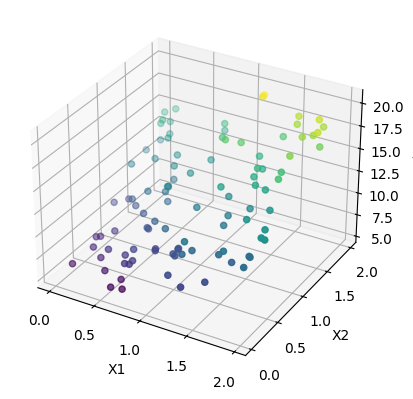

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')


# Enable interactive rotation
plt.show()

##4. Implement Linear Regression Manually
4.1 Initialization

In [21]:
theta = np.random.rand(X.shape[1] +1) # Initialize theta randomly
learning_rate = 0.01  # Adjust as needed
iterations = 1000  # Adjust as needed
m = len(X)

X_b = np.c_[np.ones((len(X), 1)), X]

###4.2 Define the Model
The prediction equation is:
$$ h_θ(X)=X⋅Θ$$

In [22]:
def predict(X, theta):
    return X.dot(theta)

In [23]:
predictions = predict(X_b, theta)

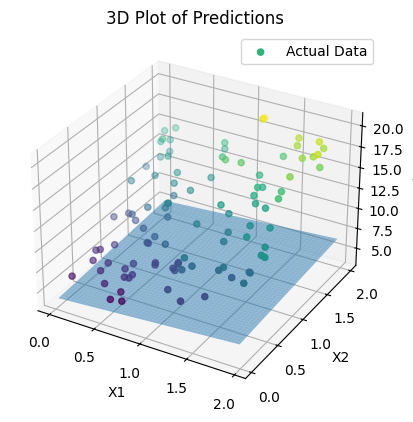

In [24]:
# Generate a grid of points for prediction
x1_grid = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
x2_grid = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)

# Predict y values for the grid
y_grid = 4 + x1_grid * theta[1] + x2_grid * theta[2]

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the prediction surface
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)


# Scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', label='Actual Data')

# Set labels

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('3D Plot of Predictions')
ax.legend()


# Show the plot
plt.show()

###4.3 Define the Cost Function
The cost function measures how well the model fits the data:
$$J(Θ) = \frac{1}{2m} \sum_{n=1}^{\infty} (h_θ(X)-y)^2$$


In [25]:
def cost_function(X, y, theta):
    """
    Compute the cost function for linear regression.

    Args:
        X: The feature matrix (including the intercept term).
        y: The target variable vector.
        theta: The model parameters.

    Returns:
        The cost (a scalar value).
    """
    m = len(y)  # Number of training examples
    predictions = predict(X, theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [26]:
print(cost_function(X_b, y, theta))

51.53462758070843


In [27]:
print((1 / m) * X_b.T.dot(predict(X_b, theta) - y))

[ -9.6592894  -10.13133995 -10.86712536]


###4.4 Gradient Descent
Gradient Descent updates θ iteratively to minimize the cost function:
$$Θ=Θ-α⋅\frac{\partial J}{\partial Θ}$$

In [28]:
# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    """
    Performs gradient descent to find the optimal theta.

    Args:
        X: The feature matrix (including the intercept term).
        y: The target variable vector.
        theta: The initial model parameters.
        learning_rate: The learning rate.
        iterations: The number of iterations.

    Returns:
        A tuple containing:
            - theta: The optimized model parameters.
            - cost_history: A list of the cost function values at each iteration.
    """
    m = len(y)
    cost_history = []   # To store the cost for each iteration
    theta_history = []  # To store the theta values for each iteration

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * X.T.dot(errors)
        theta = theta - learning_rate * gradient
        cost = (1 / (2 * m)) * np.sum(np.square(errors))  # Calculate cost for this iteration
        cost_history.append(cost)

        # Optionally print progress
        if _ % 100 == 0:
            #print(f"Iteration {i}: Cost = {cost}")
            theta_history.append(theta.copy())

    return theta, cost_history, theta_history

##4. Train the Model

In [36]:
theta_final, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)
print("Final Parameters:", theta_final)

Final Parameters: [3.89907783 3.14617138 5.08354605]


plot cost history

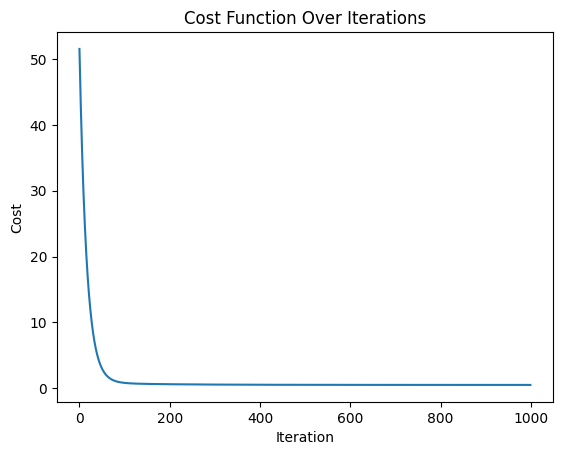

In [37]:
# Visualize the cost history
plt.plot(cost_history)
plt.title("Cost Function Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

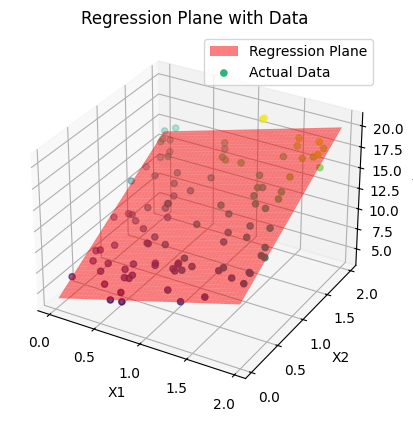

In [33]:
# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Predict y values for the grid using the final theta
y_grid = theta_final[0] + x1_grid * theta_final[1] + x2_grid * theta_final[2]
# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='red', label='Regression Plane')

# for i in range(len(theta_history)):
#   # Predict y values for the grid using the theta history
#   y_grid = theta_history[i][0] + x1_grid * theta_history[i][1] + x2_grid * theta_history[i][2]
#   # Plot the regression plane
#   ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='green')

# Scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', label='Actual Data')

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('Regression Plane with Data')
ax.legend()

# Show the plot
plt.show()

## 5. Make Predictions
Use the calculated coefficients to predict target values.

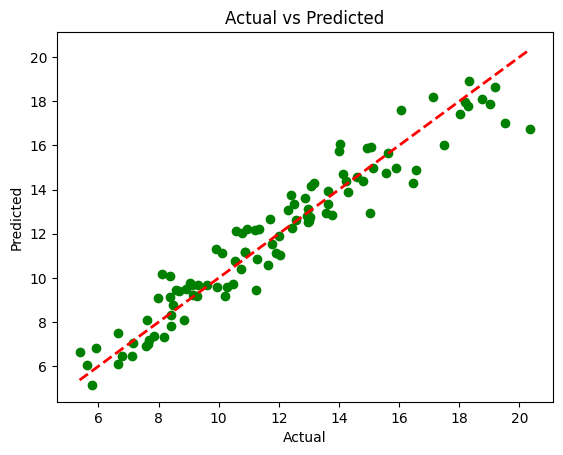

In [34]:
# Predict using the calculated coefficients
y_pred = X_b @ theta_final

# Plot actual vs predicted
plt.scatter(y, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 6. Evaluate the Model
Calculate the Mean Squared Error (MSE) and the R-squared score.

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 0.9845404555420967
R-squared Score: 0.9237523853040481
